# Homework 1

We will be doing our experiments and calculations on an Ubuntu 24, Windows [insert type], and [insert Bradley's machine].

In [1]:
import matplotlib.pyplot as pyplot
import numpy as np
import csv
from scipy import stats as st

## Visualization Functions

Here are the generic versions of the helper functions we will use for data visualization.

In [2]:
def load_csv(byte_size):
    filename = f"memtest{byte_size}B.csv"
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        data = []
        for row in reader:
            data.append(float(row[0]))
    return data


In [ ]:
def get_data_stats(data):
    mean = sum(data)/len(data)
    std = np.std(data)
    mode = st.mode(data)
    data.sort()
    
    med = data[int(len(data)/2)+1]
    return mean, med, mode, std

In [ ]:
def remove_outliers(data):
    mean, med, mode, std = get_data_stats(data)
    cleaned_data = []
    outliers = []
    for d in data:
        if d < mean + 2*std and d > mean - 2*std:
            cleaned_data.append(d)
        else:
            outliers.append(d)
    return cleaned_data, outliers

In [ ]:
#Graph showing all samples over time, add way to limit sample number displayed and where starts
def create_linear_sample_plot(data, byte_sizes, remove_outliers = True, first_sample = 0, sample_length = None):
    """Creates scatter plot of all clock cycles samples for a particular data block size.
    Parameters: data - list(ints) 
    bytes_sizes - int
    first sample (optional) - sample to start the graph"""
    if remove_outliers:
        data, outliers = remove_outliers(data)
    if sample_length is None:
        sample_length = len(data)
    data = data[first_sample:sample_length]
    sample_count = range(first_sample+1,sample_length+1)
    pyplot.scatter(sample_count,data)
    
    
    pyplot.title('Clock Cycles to Copy %i Bytes' % byte_sizes)
    pyplot.xlabel('Trial')
    pyplot.ylabel('Clock Cycles')
    pyplot.show()
    return data, outliers

In [ ]:
#Create histogram
def create_histogram(data, byte_size, remove_outliers = True):
    if remove_outliers:
        data, outliers = remove_outliers(data)
    pyplot.hist(data, bins='auto')
    pyplot.title('Histogram of Clock Cycles for %i Bytes' % byte_size)
    pyplot.xlabel('Clock Cycles')
    pyplot.ylabel('Frequency')
    pyplot.show()
    return data, outliers

In [5]:
data = load_csv(64)


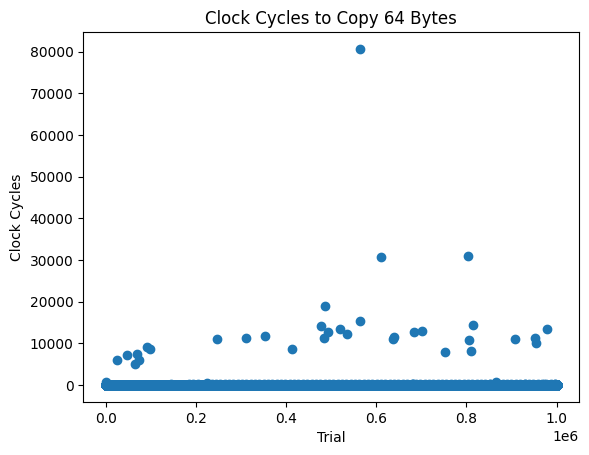

In [6]:
create_linear_sample_plot(data,64)

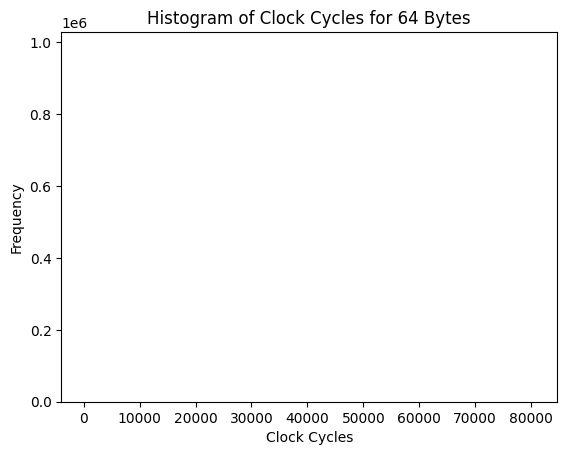

In [7]:
avg, med, mode, std = create_histogram(data,64)

In [8]:
print(avg)
print(med)
print(mode)
print(std)

45.15337
48.0
ModeResult(mode=np.float64(48.0), count=np.int64(267561))
110.84696036266894


## Ubuntu 24

### Question 1

print()

### Question 2

Machine 1:
    DRAM name: HP 855506-091
    tRCD = 17
    tRP = 17
    tCAS/tCL = 17
    tRC = tRAS + tRP = 56
    tRAS: 39
    tRRD:
    tWR:
    tWTR:
    tCWD:
    tRTP:
    tCCD:
    tBURST:


### Question 3